In [1]:
import sys

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [11]:
%matplotlib inline
from tqdm import tqdm_notebook
from importlib import reload
import matplotlib.pyplot as pl
import data_helpers as dh
import helper_funcs as hf
import ls_pricing as ls
from pars_range import Range, ParsRange
import numpy as np

pl.rcParams["figure.figsize"] = (15, 10)
pl.rcParams["figure.figsize"] = (15, 10)
pl.style.use('ggplot')

In [27]:
'''
try:
    data, info = hf.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = hf.read_data("SPH2_031612.csv")
'''
try:
    data, info = hf.read_new_data("../data2017-2018.csv")
except FileNotFoundError:
    data, info = hf.read_data()

In [36]:
data, info = dh.prepare_data(data, info)

In [21]:
# q == r
def get_rate(c, p, k, s):
    return np.log((c - p) / (k - s)) / t

In [22]:
day = 0
t = info[day].mat
strikes_call = data.strikes[True][day]
strikes_put = data.strikes[False][day]
common_strikes = np.array(list(set(strikes_call) & set(strikes_put)))
common_strikes.sort()
inx_call = np.array([False] * len(strikes_call))
inx_put = np.array([False] * len(strikes_put))
for inx, strike in enumerate(strikes_call):
    inx_call[inx] = strike in common_strikes
for inx, strike in enumerate(strikes_put):
    inx_put[inx] = strike in common_strikes
common_strikes

array([ 1010.,  1020.,  1025.,  1030.,  1040.,  1050.,  1060.,  1070.,
        1075.,  1080.,  1090.,  1100.,  1110.,  1120.,  1125.,  1130.,
        1140.,  1150.,  1160.,  1170.,  1175.,  1180.,  1190.,  1200.,
        1210.,  1220.,  1225.,  1230.,  1240.,  1250.,  1260.,  1270.,
        1275.,  1280.,  1290.,  1300.,  1310.,  1320.,  1325.,  1330.,
        1340.,  1350.,  1360.,  1370.,  1375.,  1380.,  1390.,  1400.,
        1410.,  1420.,  1425.,  1430.,  1440.,  1450.,  1460.,  1470.,
        1475.,  1480.,  1490.,  1500.,  1510.])

In [7]:
c = data.prices[True][day][inx_call]
p = data.prices[False][day][inx_put]
k = common_strikes
s = info[day].spot

# get_rate(c, p, k, s)

In [23]:
from scipy.optimize import differential_evolution
from sklearn.metrics import mean_absolute_error, mean_squared_error


def parity(r, q): return c - p + k * np.exp(-r * t) - s * np.exp(-q * t)
def opt_func(pars): return mean_absolute_error(np.zeros(len(c)), parity(*pars))
differential_evolution(lambda pars: opt_func(pars), bounds=((0, 1), (0, 1)))

     fun: 0.087953285320241339
     jac: array([  4.20588264,  12.40352275])
 message: 'Optimization terminated successfully.'
    nfev: 1164
     nit: 35
 success: True
       x: array([ 0.00090381,  0.00153774])

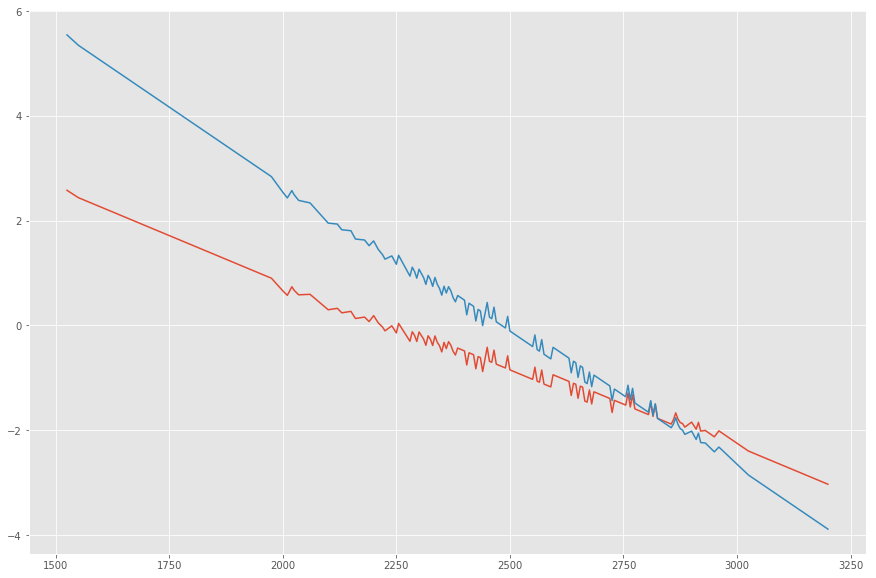

In [24]:
r = .0049
q = .0049

pl.plot(k, parity(.0049, .0048))
pl.plot(k, parity(.008, .008))

In [40]:
list(map(lambda x: len(x), data.prices[False]))

[43,
 44,
 44,
 44,
 36,
 39,
 36,
 32,
 31,
 30,
 25,
 29,
 29,
 27,
 25,
 27,
 25,
 24,
 23,
 23,
 25,
 22,
 27,
 26,
 30,
 29,
 23,
 25,
 23,
 23,
 22,
 20,
 23,
 19,
 18,
 20,
 23,
 22,
 22,
 26,
 21,
 22,
 21,
 17,
 18,
 17,
 17,
 12,
 14,
 11,
 13,
 50,
 61,
 60,
 55,
 50,
 46,
 47,
 53,
 56,
 46,
 42,
 47,
 47,
 45,
 46,
 45,
 46,
 45,
 47,
 41,
 36,
 32,
 28,
 25,
 30,
 24,
 19,
 20,
 34,
 34,
 54,
 123,
 88,
 88,
 117,
 105,
 82,
 79,
 63,
 54,
 52]

In [37]:
results = []
for day in tqdm_notebook(range(len(info))):
    t = info[day].mat
    strikes_call = data.strikes[True][day]
    strikes_put = data.strikes[False][day]
    common_strikes = np.array(list(set(strikes_call) & set(strikes_put)))
    common_strikes.sort()
    inx_call = np.array([False] * len(strikes_call))
    inx_put = np.array([False] * len(strikes_put))
    for inx, strike in enumerate(strikes_call):
        inx_call[inx] = strike in common_strikes
    for inx, strike in enumerate(strikes_put):
        inx_put[inx] = strike in common_strikes
    c = data.prices[True][day][inx_call]
    p = data.prices[False][day][inx_put]
    k = common_strikes
    s = info[day].spot
    
    def parity(r, q): return c - p + k * np.exp(-r * t) - s * np.exp(-q * t)
    def opt_func(pars): return mean_absolute_error(np.zeros(len(c)), parity(*pars))
    results.append(differential_evolution(lambda pars: opt_func(pars), bounds=((0, 1), (0, 1))))
tmp = list(map(lambda x: [x.fun, x.x], results))

HBox(children=(IntProgress(value=0, max=92), HTML(value='')))

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
pl.plot(list(map(lambda x: x[1][0], tmp)), label='r')
pl.plot(list(map(lambda x: x[1][1], tmp)), label='q')
pl.legend()
pl.show()
pl.plot(list(map(lambda x: x[0], tmp)), label='MAE')
pl.legend()
pl.show()

HBox(children=(IntProgress(value=0, max=92), HTML(value='')))

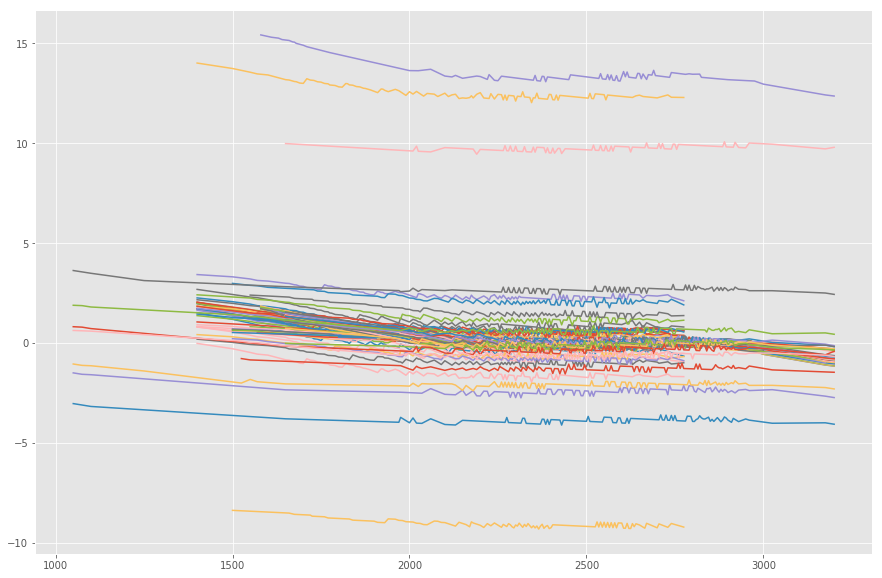

In [35]:
pl.figure()
for day in tqdm_notebook(range(len(info))):
    t = info[day].mat
    strikes_call = data.strikes[True][day]
    strikes_put = data.strikes[False][day]
    common_strikes = np.array(list(set(strikes_call) & set(strikes_put)))
    common_strikes.sort()
    inx_call = np.array([False] * len(strikes_call))
    inx_put = np.array([False] * len(strikes_put))
    for inx, strike in enumerate(strikes_call):
        inx_call[inx] = strike in common_strikes
    for inx, strike in enumerate(strikes_put):
        inx_put[inx] = strike in common_strikes
    c = data.prices[True][day][inx_call]
    p = data.prices[False][day][inx_put]
    k = common_strikes
    s = info[day].spot
    def parity(r, q): return c - p + k * np.exp(-r * t) - s * np.exp(-q * t)
    def opt_func(pars): return mean_absolute_error(np.zeros(len(c)), parity(*pars))
    # res = differential_evolution(func=opt_func, bounds=((0, .1), (0, .1)))
    # pl.plot(k, parity(*res.x))
    pl.plot(k, parity(.008, .008))